<a href="https://colab.research.google.com/github/TheArslan23/Portfolio/blob/master/INVENTROY%20OPETIMIZATION/INVENTROY_OPETIMIZATION_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inventory, Purchase, and Sales Analysis and Optimization

This project aims to enhance inventory management practices for Bibitor, LLC, a retail wine and spirits company operating across multiple locations. WBibitor, LLC manages sales and cost of goods sold that reach into the hundreds of millions, rendering traditional spreadsheets insufficient. The vast volume of data, which includes millions of sales, purchase, and inventory records, requires a sophisticated approach for effective analysis. the goal of this project is to leverage extensive data analysis to optimize inventory control and extract valuable insights from the company's operation, particularly sales and purchases.The project tasks are divided into two main objectives:


- Analyze the inventory management process and provide recommendations for optimization.
- Extract meaningful business insights from the data and provide actionable recommendations.

## Data Exploration and Cleaning

In [11]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Loading datasets
purchase_prices = pd.read_csv('PurchasePricesDec.csv')
beg_inv = pd.read_csv('BegInvFINAL.csv')
end_inv = pd.read_csv('EndInvFINAL.csv')
invoice_purchases = pd.read_csv('InvoicePurchases.csv')
purchases = pd.read_csv('PurchasesFINAL.csv')
sales = pd.read_csv('SalesFINAL.csv')

In [13]:
# Checking for missing data in each dataset
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]

    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)


Missing values in purchase_prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing values in end_inv:
City    1284
dtype: int64

Missing values in invoice_purchases:
Approval    5169
dtype: int64

Missing values in purchases:
VendorNumber      1
VendorName        1
PONumber          1
PODate            1
ReceivingDate     1
InvoiceDate       1
PayDate           1
PurchasePrice     1
Quantity          1
Dollars           1
Classification    1
dtype: int64

Missing values in sales:
SalesQuantity     1
SalesDollars      1
SalesPrice        1
SalesDate         1
Volume            1
Classification    1
ExciseTax         1
VendorNo          1
VendorName        1
dtype: int64


In [14]:
#Explore the datasets
def explore_dataset(dataframe):
    summary = []
    for column in dataframe.columns:
        data_type = dataframe[column].dtype
        total_count = len(dataframe[column])
        unique_count = dataframe[column].nunique()
        unique_sample = dataframe[column].unique()[0:10]
        missing_values = dataframe[column].isnull().sum()
        summary.append({'Column': column, 'Data Type': data_type, 'total count': total_count,
                        'Unique Count': unique_count, 'Unique Sample': unique_sample,
                        'Missing Values': missing_values})
    return pd.DataFrame(summary)

## Explore all dataset in one go-- make sure IDE displays maximum output with side scrolling.
datasets = [("Beginning Inventory", beg_inv),
            ("Ending Inventory", end_inv),
            ("Purchase", purchases),
            ("Purchase Invoices", invoice_purchases),
            ("Purchase Price", purchase_prices),
            ("Sales", sales)]

for index, (dataset_name, dataset) in enumerate(datasets, start=1):
    print(f"{index}. Explore {dataset_name} dataset key details:")
    print(explore_dataset(dataset))
    print("\n")

1. Explore Beginning Inventory dataset key details:
        Column Data Type  total count  Unique Count  \
0  InventoryId    object       206529        206529   
1        Store     int64       206529            79   
2         City    object       206529            67   
3        Brand     int64       206529          8094   
4  Description    object       206529          7291   
5         Size    object       206529            41   
6       onHand     int64       206529           474   
7        Price   float64       206529           329   
8    startDate    object       206529             1   

                                       Unique Sample  Missing Values  
0  [1_HARDERSFIELD_58, 1_HARDERSFIELD_60, 1_HARDE...               0  
1                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]               0  
2  [HARDERSFIELD, ASHBORNE, HORNSEY, EANVERNESS, ...               0  
3         [58, 60, 62, 63, 72, 75, 77, 79, 115, 120]               0  
4  [Gekkeikan Black & Gold Sake, Canadian 

In [15]:
# Handling missing values for purchase_prices dataset
cols_to_check = ['Description', 'Size', 'Volume']
for col in cols_to_check:
    purchase_prices = purchase_prices[purchase_prices[col].notna()]

# Handling missing values for end_inv dataset
if end_inv['Store'].nunique() == end_inv['City'].nunique():
    city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
    end_inv['City'] = end_inv['City'].fillna(end_inv['Store'].map(city_store_mapping))
else:
    end_inv['City'].fillna('Unknown', inplace=True)

# Handling missing values for invoice_purchases dataset
invoice_purchases['Approval'].fillna('Pending', inplace=True)

# Handling missing values for purchases dataset
purchases = purchases[purchases['Size'].notna()]

datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]

    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)
    else:
        print(f"\nNo missing values in {name}.")

<ipython-input-15-42be408dbccd>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  end_inv['City'].fillna('Unknown', inplace=True)
<ipython-input-15-42be408dbccd>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi


No missing values in purchase_prices.

No missing values in beg_inv.

No missing values in end_inv.

No missing values in invoice_purchases.

Missing values in purchases:
VendorNumber      1
VendorName        1
PONumber          1
PODate            1
ReceivingDate     1
InvoiceDate       1
PayDate           1
PurchasePrice     1
Quantity          1
Dollars           1
Classification    1
dtype: int64

Missing values in sales:
SalesQuantity     1
SalesDollars      1
SalesPrice        1
SalesDate         1
Volume            1
Classification    1
ExciseTax         1
VendorNo          1
VendorName        1
dtype: int64


In [ ]:
# Grouping by Brand and Description and summarize inventory for beginning of the year
beg_summary = beg_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Grouping by Brand and Description and summarize inventory for end of the year
end_summary = end_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Identifying top 5 products at the beginning and end of the year
top_5_beg = beg_summary.head(5)
top_5_end = end_summary.head(5)

# Identifying bottom 5 products at the beginning and end of the year
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_summary.tail(5)

print("Top 5 products at the beginning of the year:\n", top_5_beg)
print("\nTop 5 products at the end of the year:\n", top_5_end)
print("\nBottom 5 products at the beginning of the year:\n", bottom_5_beg)
print("\nBottom 5 products at the end of the year:\n", bottom_5_end)

Top 5 products at the beginning of the year:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Top 5 products at the end of the year:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Bottom 5 products at the beginning of the year:
 Brand  Description                 
42676  Kistler Chard Sonma Mountain    0
34693  Valley of the Moon Chard        0
42710  Pommery Pink Pop Rose           0
22647  Guillaume Vrignaud Chablis 1    0
21283  J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64

Bottom 5 products at the end of the year:
 Brand  Descriptio

In [ ]:
# Finding the best-selling products
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Best selling ten products:\n{best_selling_products}\n")

# Finding the slow-moving products
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Slow-moving ten products:\n{slow_moving_products}")

Best selling ten products:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Slow-moving ten products:
                                    SalesQuantity
Brand Description                                
25727 Chappellet Cab Svgn Pritchrd              1
23110 Duckhorn Estates Merlot                   1
2505  Bowmore Legend Single Malt                1
1043  Jim Beam Gift Pak                         1
23109 DeLille Cellars Chaleur Blnc            

<Axes: title={'center': 'Sales Quantity Over Time'}, xlabel='SalesDate'>

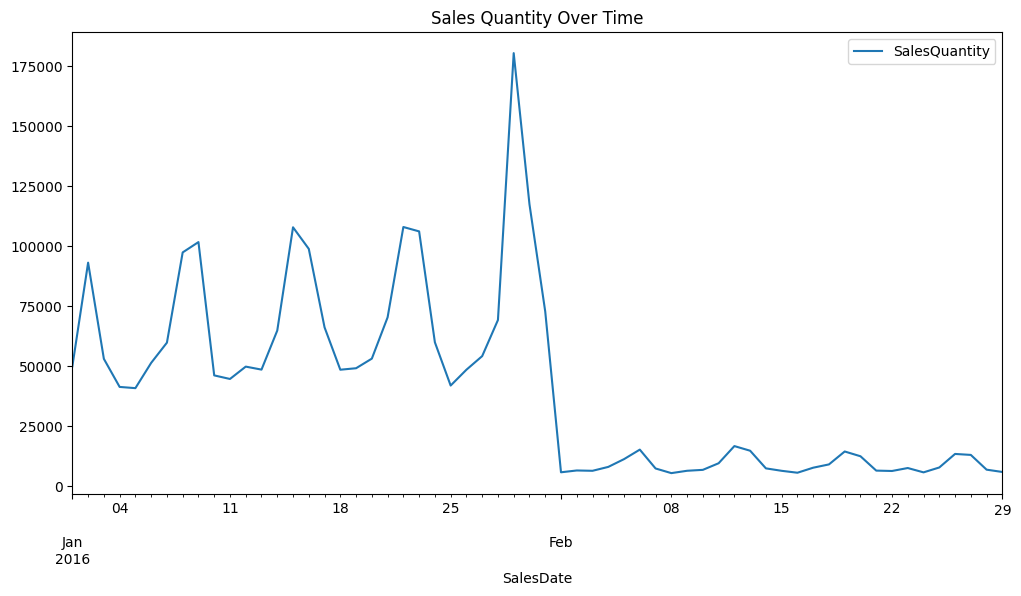

In [ ]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales_quantity_trend = sales.groupby('SalesDate').agg({'SalesQuantity': 'sum'})
sales_quantity_trend.plot(figsize=(12, 6), title='Sales Quantity Over Time')

<Axes: title={'center': 'Average Sales Price Over Time'}, xlabel='SalesDate'>

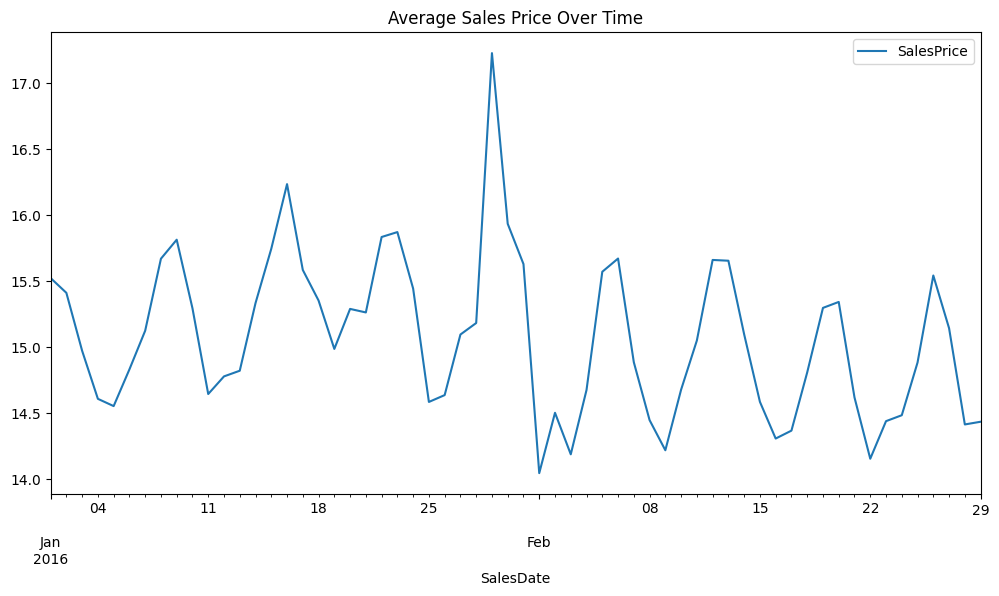

In [ ]:
avg_price_trend = sales.groupby('SalesDate').agg({'SalesPrice': 'mean'})
avg_price_trend.plot(figsize=(12, 6), title='Average Sales Price Over Time')

In [ ]:
vendor_purchase_volume = invoice_purchases.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("Top 10 Vendors by Purchase Volume:\n", vendor_purchase_volume.head(10))

Top 10 Vendors by Purchase Volume:
                              Quantity
VendorName                           
DIAGEO NORTH AMERICA INC      5459788
JIM BEAM BRANDS COMPANY       2737165
MARTIGNETTI COMPANIES         2637275
CONSTELLATION BRANDS INC      2325892
E & J GALLO WINERY            1858260
PERNOD RICARD USA             1647558
BACARDI USA INC               1427075
SAZERAC CO INC                1417727
M S WALKER INC                1372841
ULTRA BEVERAGE COMPANY LLP    1077527


In [ ]:
vendor_purchase_cost = purchases.groupby('VendorName').agg({'PurchasePrice': 'sum'}).sort_values(by='PurchasePrice', ascending=False)
print("Top 10 Vendors by Purchase Cost:\n", vendor_purchase_cost.head(10))

Top 10 Vendors by Purchase Cost:
                              PurchasePrice
VendorName                                
DIAGEO NORTH AMERICA INC        3638839.85
JIM BEAM BRANDS COMPANY         2282154.77
PERNOD RICARD USA               1819246.07
MARTIGNETTI COMPANIES           1773408.50
BACARDI USA INC                 1221293.05
CONSTELLATION BRANDS INC        1218513.56
ULTRA BEVERAGE COMPANY LLP      1207264.25
E & J GALLO WINERY              1097114.83
BROWN-FORMAN CORP               1006857.35
M S WALKER INC                   904016.01


In [ ]:
# Converting PODate and ReceivingDate columns to datetime
purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')

# Checking if there are any null values after conversion
if purchases['PODate'].isnull().any() or purchases['ReceivingDate'].isnull().any():
    print("There are invalid date entries in the dataset. Please review the data.")
else:
    purchases['SupplyDuration'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
    average_supply_duration = purchases['SupplyDuration'].mean()
    print("Average Supply Duration (in days):", average_supply_duration)

Average Supply Duration (in days): 7.628488731361682


In [ ]:
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
purchases['PayDate'] = pd.to_datetime(purchases['PayDate'])
purchases['PaymentDuration'] = (purchases['PayDate'] - purchases['InvoiceDate']).dt.days

average_payment_duration = purchases['PaymentDuration'].mean()
print("Average Payment Duration (in days):", average_payment_duration)

Average Payment Duration (in days): 35.63583268268742


In [ ]:
reduced_purchases = purchases[['VendorName', 'PurchasePrice']]
top_vendors = reduced_purchases.groupby('VendorName').sum()['PurchasePrice'].nlargest(10)
print(top_vendors)

VendorName
DIAGEO NORTH AMERICA INC       3638839.85
JIM BEAM BRANDS COMPANY        2282154.77
PERNOD RICARD USA              1819246.07
MARTIGNETTI COMPANIES          1773408.50
BACARDI USA INC                1221293.05
CONSTELLATION BRANDS INC       1218513.56
ULTRA BEVERAGE COMPANY LLP     1207264.25
E & J GALLO WINERY             1097114.83
BROWN-FORMAN CORP              1006857.35
M S WALKER INC                  904016.01
Name: PurchasePrice, dtype: float64


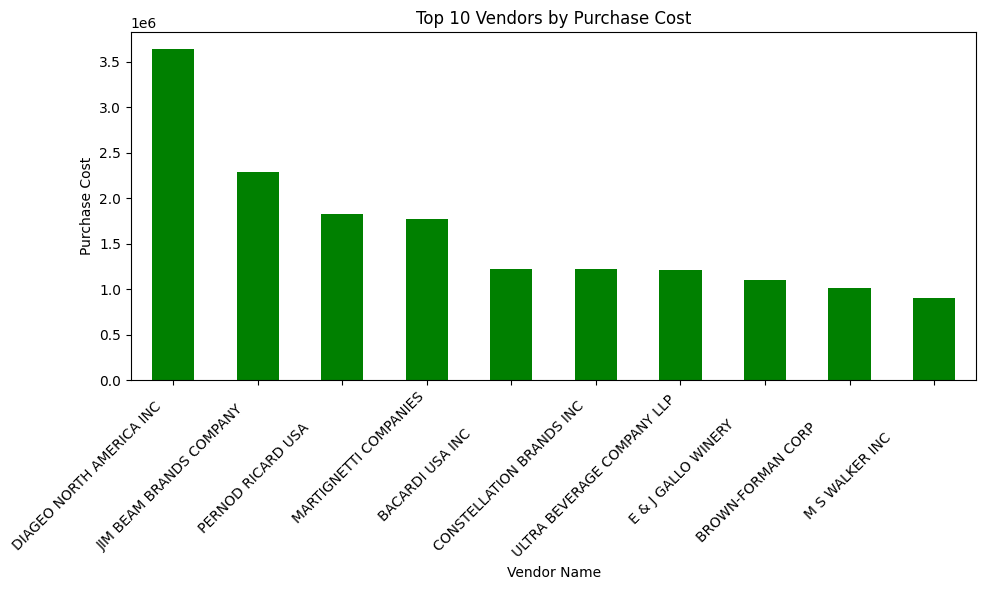

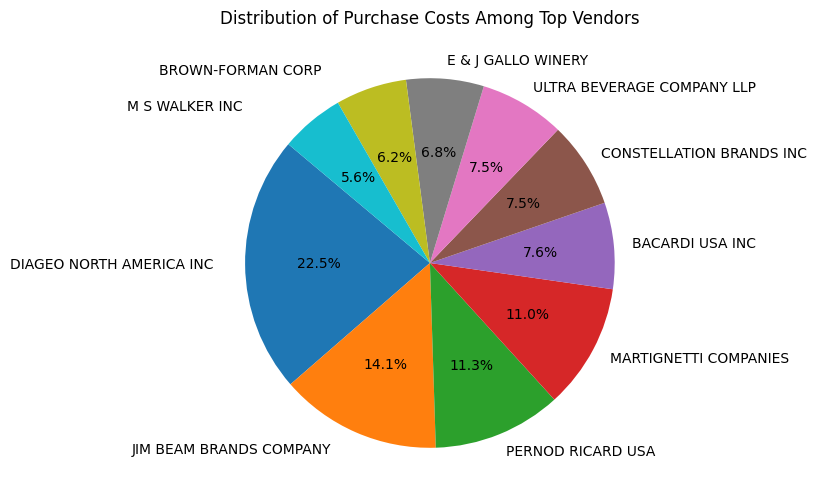

In [ ]:
# Bar graph for top vendors by purchase cost
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='bar', color='green')
plt.title('Top 10 Vendors by Purchase Cost')
plt.ylabel('Purchase Cost')
plt.xlabel('Vendor Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart for distribution of purchase costs among the top vendors
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchase Costs Among Top Vendors')
plt.ylabel('')  # to remove the default 'PurchasePrice' label from the y-axis
plt.show()

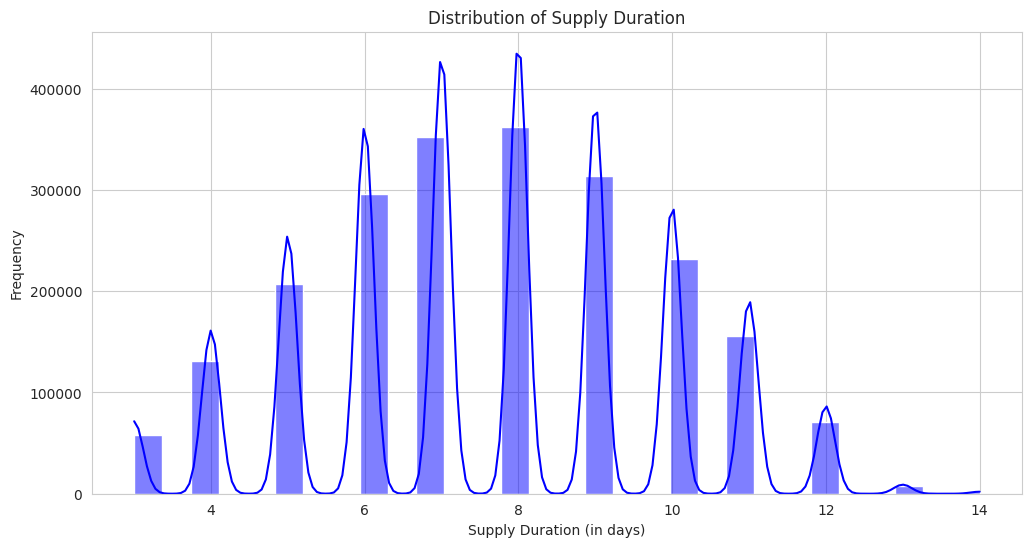

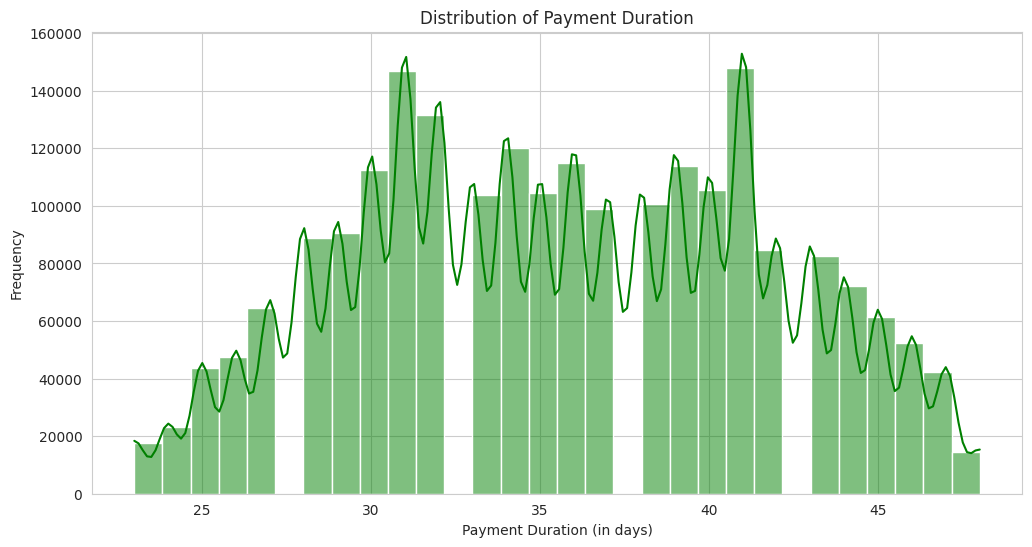

In [ ]:
# Style settings
sns.set_style("whitegrid")

# Histogram for Supply Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['SupplyDuration'], kde=True, bins=30, color='blue')
plt.title('Distribution of Supply Duration')
plt.xlabel('Supply Duration (in days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Payment Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['PaymentDuration'], kde=True, bins=30, color='green')
plt.title('Distribution of Payment Duration')
plt.xlabel('Payment Duration (in days)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
start_date = sales['SalesDate'].min()
end_date = sales['SalesDate'].max()
total_days = (end_date - start_date).days

# Calculating Sales Velocity for each product
sales_velocity = sales.groupby(['Brand', 'Description']).agg(Total_Sales=('SalesQuantity', 'sum')).reset_index()
sales_velocity['Sales_Per_Day'] = sales_velocity['Total_Sales'] / total_days

purchases.loc[:, 'Lead_Time'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
lead_times = purchases.groupby(['Brand', 'Description']).agg(Avg_Lead_Time=('Lead_Time', 'mean')).reset_index()

In [ ]:
# Merging the data
merged_data = pd.merge(sales_velocity, lead_times, on=['Brand', 'Description'], how='left')

# Calculating Optimal Stock Level
merged_data['Optimal_Stock_Level'] = merged_data['Sales_Per_Day'] * merged_data['Avg_Lead_Time']

# Calculating Safety Stock using maximum sales for each product
max_sales = sales.groupby(['Brand', 'Description']).agg(Max_Daily_Sales=('SalesQuantity', 'max')).reset_index()
merged_data = pd.merge(merged_data, max_sales, on=['Brand', 'Description'], how='left')

merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

In [ ]:
# Filtering products where Sales_Per_Day value is greater than Max_Daily_Sales value
problematic_products = merged_data[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales']]

# Getting the number of problematic products
num_problematic_products = len(problematic_products)

# Printing problematic products to the screen
print(f"There are {num_problematic_products} products where the Sales_Per_Day value is greater than the Max_Daily_Sales value.")
if num_problematic_products > 0:
    print(problematic_products[['Brand', 'Description', 'Sales_Per_Day', 'Max_Daily_Sales']])

There are 555 products where the Sales_Per_Day value is greater than the Max_Daily_Sales value.
      Brand                   Description  Sales_Per_Day  Max_Daily_Sales
7        77   Three Olives Espresso Vodka      15.389831                8
8        79      Three Olives Loopy Vodka       7.050847                5
76      273      Sauza Extra Gold Tequila      10.372881                9
139     482              Absolut 80 Proof      37.135593               23
142     497        Capt Morgan Spiced Rum      39.644068               38
...     ...                           ...            ...              ...
7426  44712    Sonoma-Cutrer Chard Sonoma      27.610169               25
7580  46379  Ghost Pine Cab Svgn LMartini      14.474576               12
7590  46447         Gascon Malbec Mendoza      22.796610               16
7592  46458      Layer Cake Barosa Shiraz       7.305085                7
7594  46476          Tilia Malbec Mendoza      26.169492               19

[555 rows x 4 c

In [ ]:
# Updating Max_Daily_Sales for problematic products
merged_data.loc[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales'], 'Max_Daily_Sales'] = merged_data['Sales_Per_Day']

# Updating Safety Stock and Recommended Stock Level after modifying Max_Daily_Sales
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

<ipython-input-24-0ff23cf4f99b>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 15.38983051   7.05084746  10.37288136  37.13559322  39.6440678
  14.           4.28813559  13.74576271  30.3220339   19.93220339
   7.50847458  25.01694915  10.01694915   7.27118644  13.98305085
  45.08474576  17.22033898  38.27118644  81.45762712 162.33898305
  30.3220339   15.88135593  33.79661017  17.72881356  29.72881356
   5.3559322    6.55932203  87.93220339  19.57627119 124.77966102
  34.15254237  21.69491525  29.55932203  52.91525424  29.57627119
  10.13559322  15.74576271  21.69491525  12.52542373  14.96610169
  23.30508475  16.52542373  17.05084746  18.69491525  11.08474576
   7.40677966  26.25423729   6.72881356  27.93220339   4.3559322
   6.38983051  33.59322034  45.13559322 391.88135593  23.52542373
  21.52542373  39.11864407   3.27118644   5.22033898   2.42372881
  30.42372881   5.01694915  27.61016949  14.30

<ipython-input-25-b43cf59563b1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis')  # showing top 20 products for better visualization


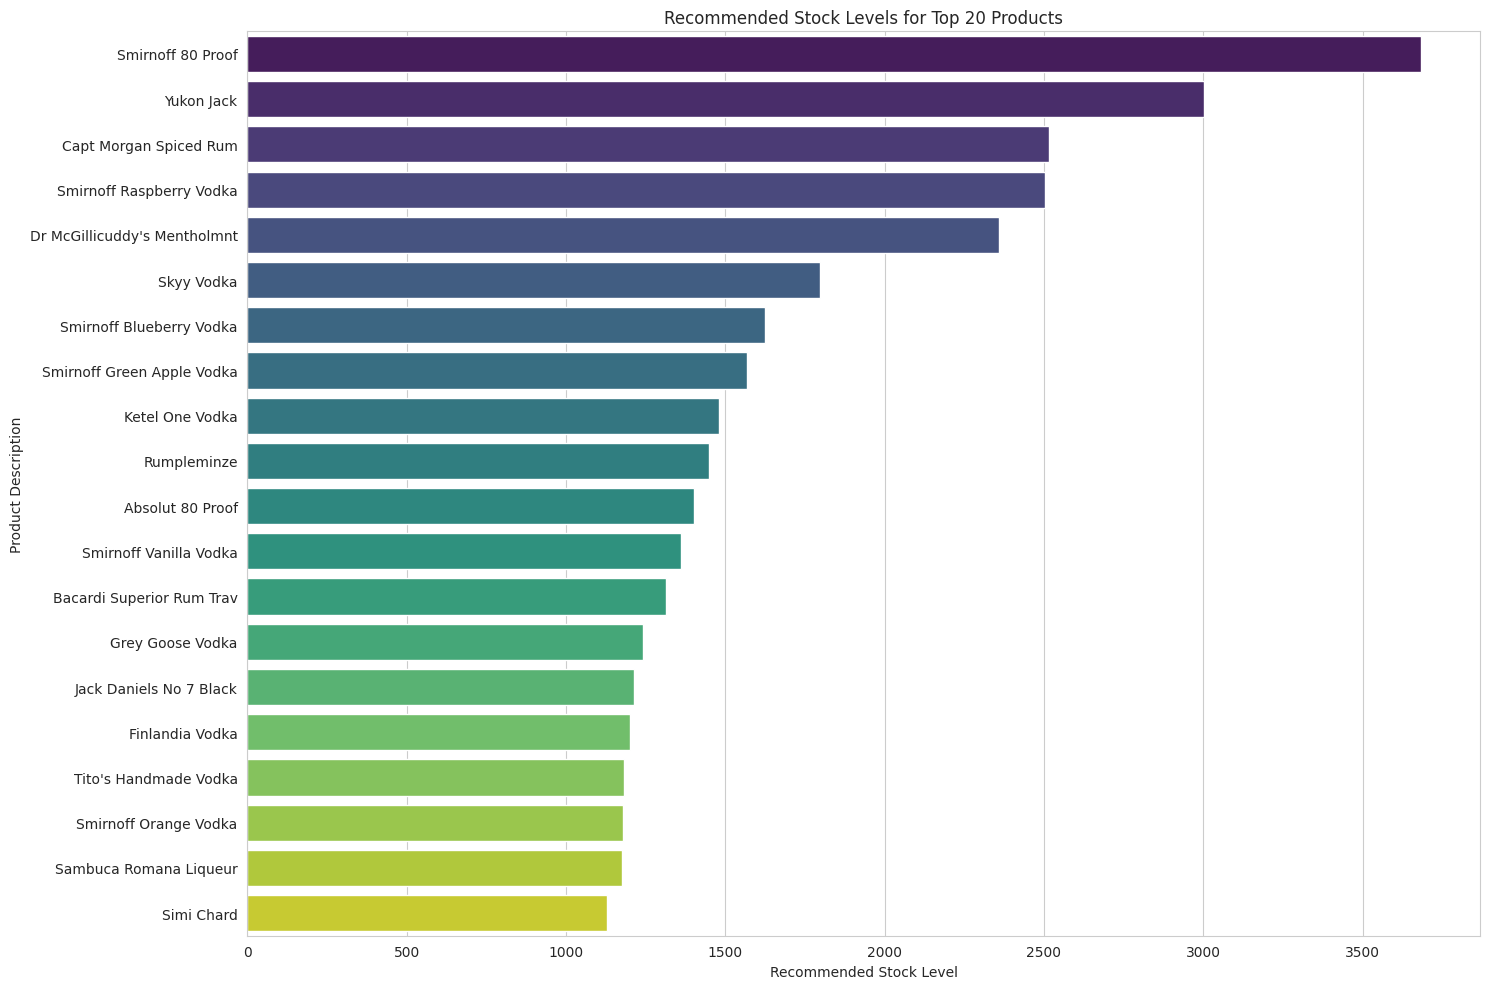

In [ ]:
# Sorting the data by Recommended_Stock_Level for better visualization
sorted_data = merged_data.sort_values(by='Recommended_Stock_Level', ascending=False)

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis')  # showing top 20 products for better visualization
plt.xlabel('Recommended Stock Level')
plt.ylabel('Product Description')
plt.title('Recommended Stock Levels for Top 20 Products')
plt.tight_layout()
plt.show()

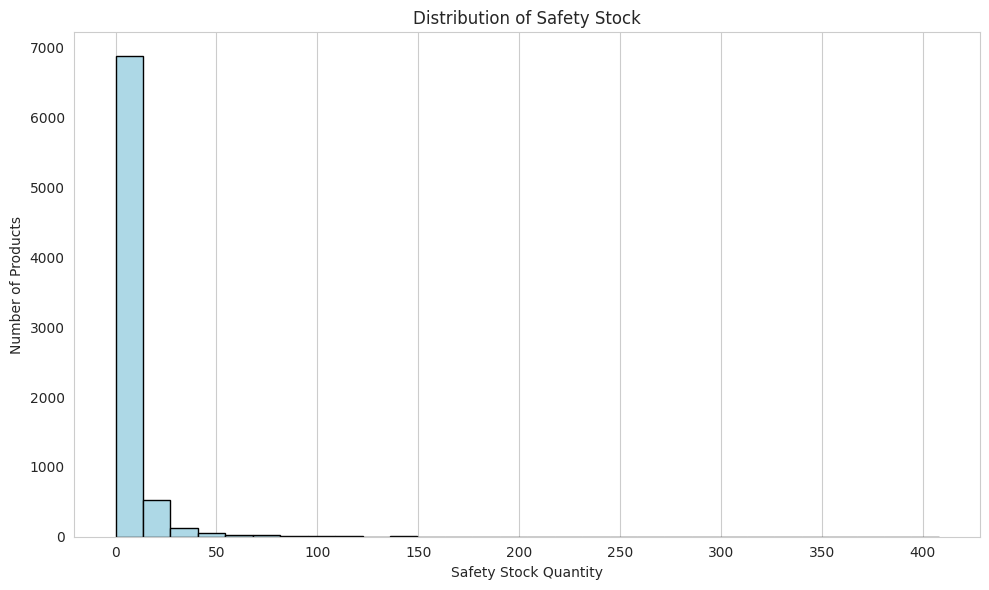

In [ ]:
# Plotting the histogram for Safety Stock distribution
plt.figure(figsize=(10,6))
plt.hist(merged_data['Safety_Stock'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Safety Stock')
plt.xlabel('Safety Stock Quantity')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

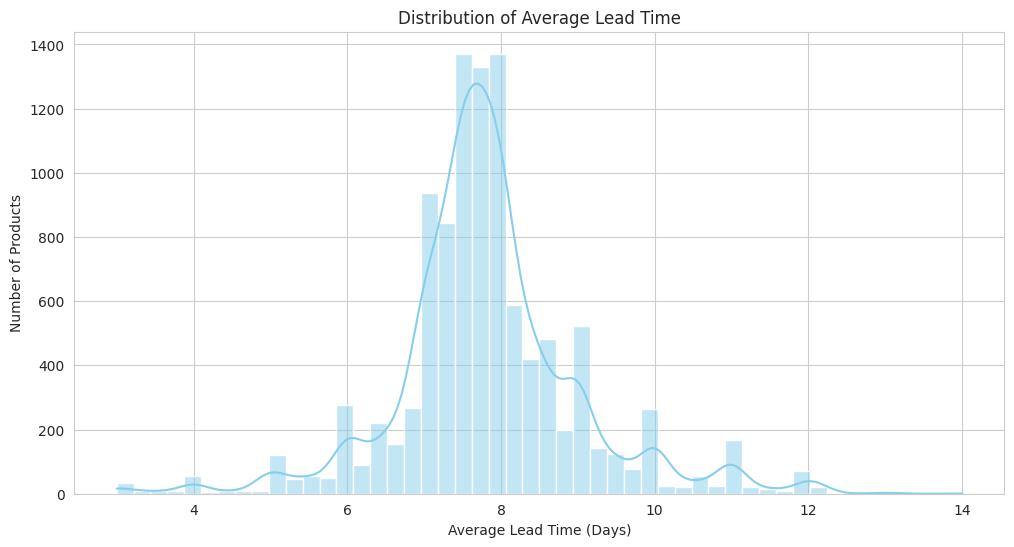

In [ ]:
# Styling
sns.set_style("whitegrid")

# Creating the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=lead_times, x='Avg_Lead_Time', bins=50, color='skyblue', kde=True)
plt.title('Distribution of Average Lead Time')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Number of Products')
plt.show()

<ipython-input-28-3cba567916d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='Sales_Per_Day', data=top_products, palette='viridis')


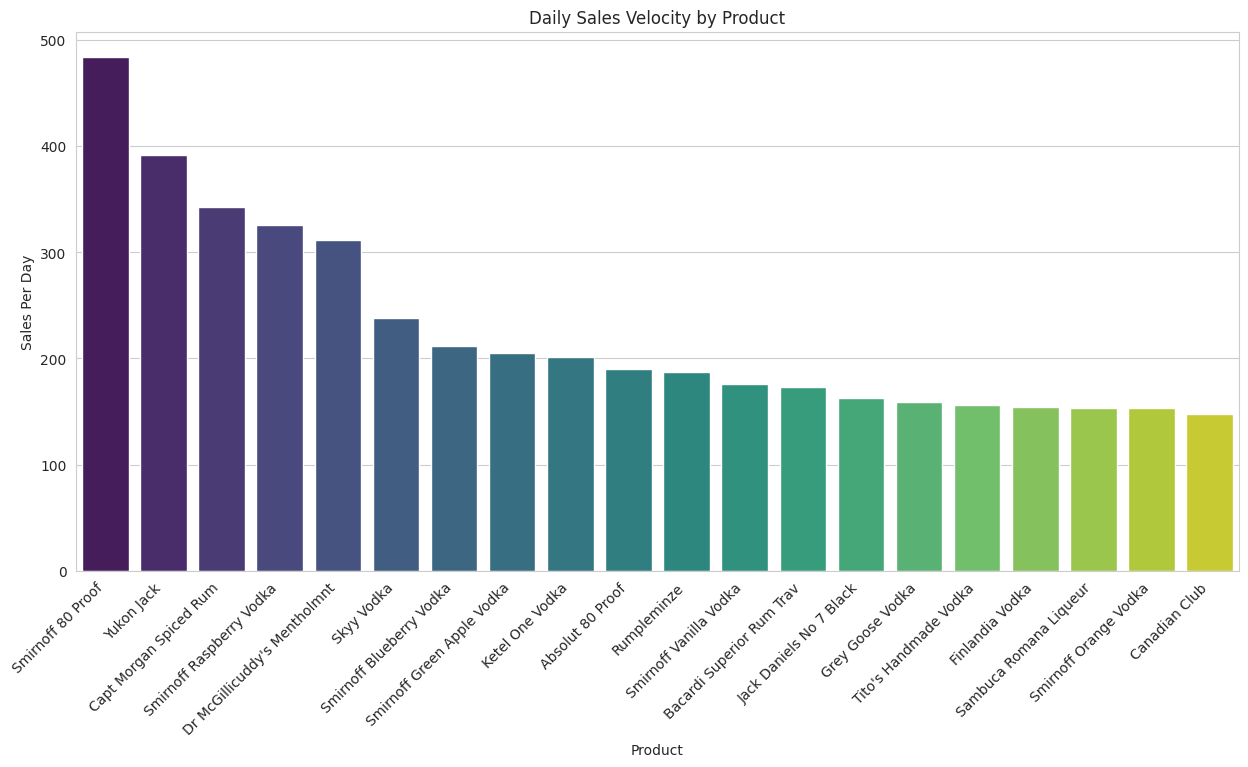

In [ ]:
# Sorting the data by Sales_Per_Day in descending order to get top products
top_products = sales_velocity.sort_values(by='Sales_Per_Day', ascending=False).head(20)  # you can adjust the number as needed

# Creating the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Description', y='Sales_Per_Day', data=top_products, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Daily Sales Velocity by Product')
plt.xlabel('Product')
plt.ylabel('Sales Per Day')
plt.show()

In [ ]:
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])
latest_inventory_date = end_inv['endDate'].max()
current_inventory = end_inv[end_inv['endDate'] == latest_inventory_date]

# Summarizing the current stock levels by product.
current_stock_levels = current_inventory.groupby(['Brand', 'Description']).agg(Current_Stock=('onHand', 'sum')).reset_index()

# Merging the current stock levels with the previously calculated data.
final_data = pd.merge(merged_data, current_stock_levels, on=['Brand', 'Description'], how='left')

# Assume zero current stock for any products not present in the current inventory.
final_data['Current_Stock'] = final_data['Current_Stock'].fillna(0)

      Brand                   Description  Current_Stock  \
0        58   Gekkeikan Black & Gold Sake          385.0   
1        60        Canadian Club 1858 VAP          146.0   
2        61         Margaritaville Silver           12.0   
3        62      Herradura Silver Tequila          459.0   
4        63    Herradura Reposado Tequila          442.0   
...     ...                           ...            ...   
7653  90084  Les Fiefs Lagrange St Jul 11            2.0   
7654  90085  Ch Lilian 09 Ladouys St Este            6.0   
7655  90086  La Dame Montrose St Estep 11           32.0   
7656  90087  Ch Mouton Rothschild 12 Paui           45.0   
7657  90089    Ch Lynch Bages 12 Pauillac          124.0   

      Recommended_Stock_Level  Order_Quantity  
0                   39.542373        0.000000  
1                   16.890512        0.000000  
2                   14.896271        2.896271  
3                   20.577003        0.000000  
4                   18.105683        0.

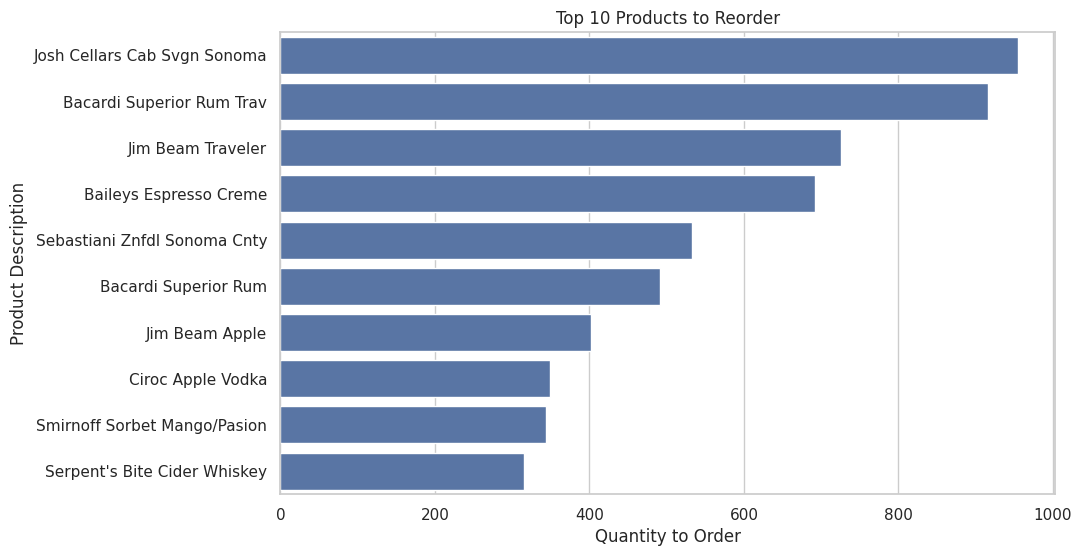

In [ ]:
# Calculating how much of each product needs to be ordered if current stock is below recommended levels.
final_data['Order_Quantity'] = final_data['Recommended_Stock_Level'] - final_data['Current_Stock']
final_data['Order_Quantity'] = final_data['Order_Quantity'].clip(lower=0)  # Setting negative order quantities to zero.

# Reporting the results.
print(final_data[['Brand', 'Description', 'Current_Stock', 'Recommended_Stock_Level', 'Order_Quantity']])


# Creating a graph using Seaborn.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Quantity', y='Description', data=final_data.sort_values('Order_Quantity', ascending=False).head(10))
plt.title('Top 10 Products to Reorder')
plt.xlabel('Quantity to Order')
plt.ylabel('Product Description')
plt.show()

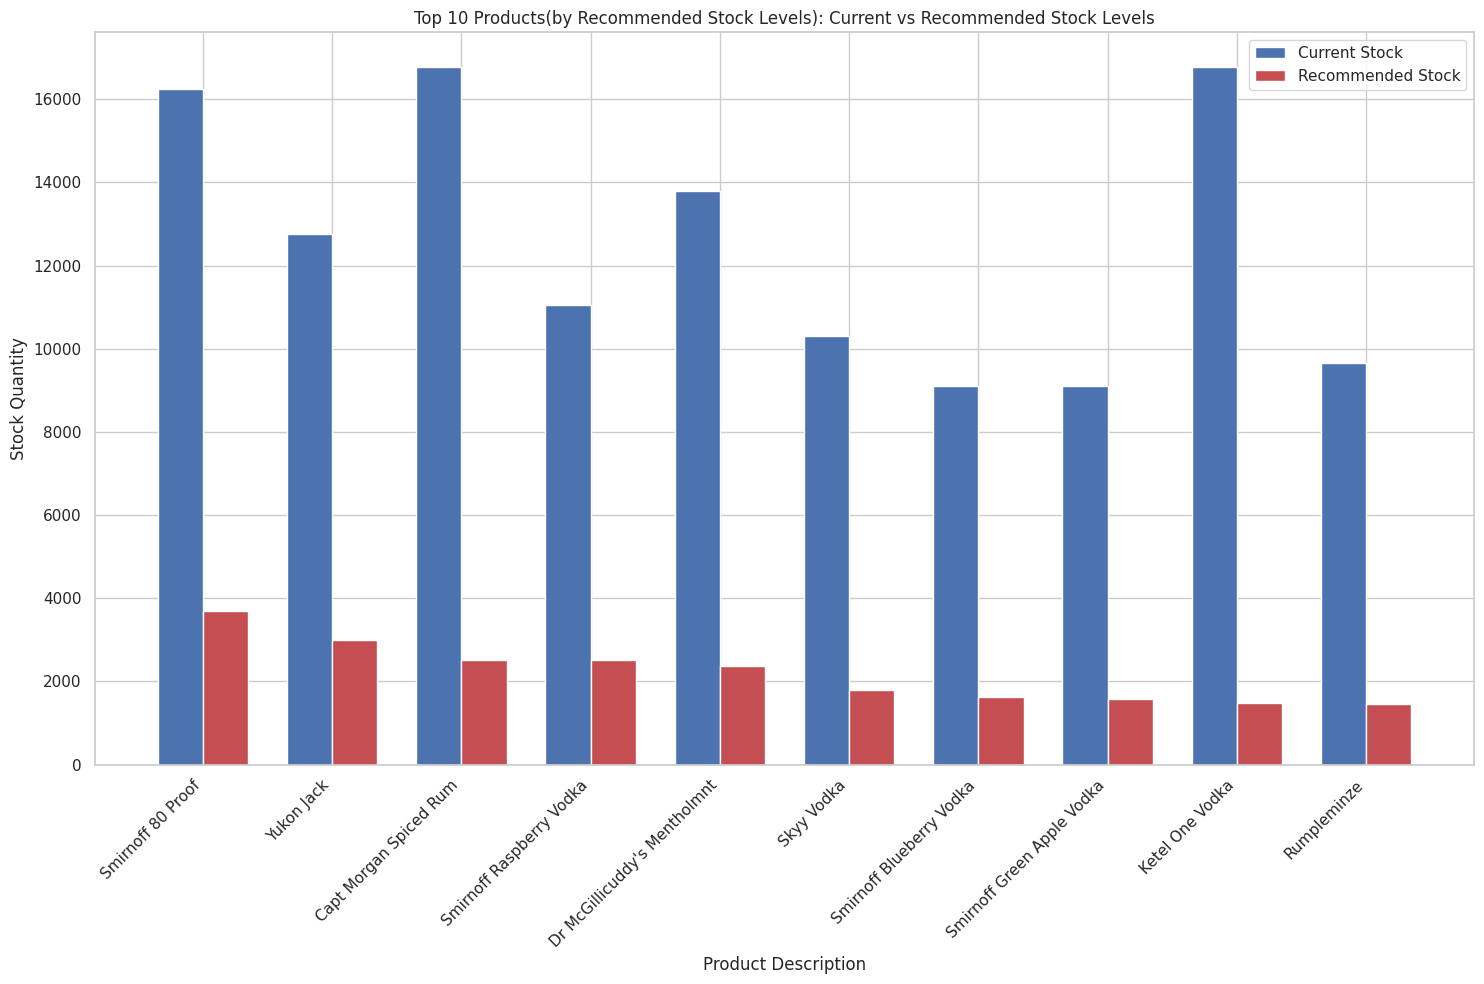

In [ ]:
# Sorting the products by recommended stock level
sorted_data = final_data.sort_values(by='Recommended_Stock_Level', ascending=False).head(10)  # To show the top 10 products

# Creating a double-column bar chart
bar_width = 0.35
index = np.arange(len(sorted_data))

plt.figure(figsize=(15, 10))
bar1 = plt.bar(index, sorted_data['Current_Stock'], bar_width, label='Current Stock', color='b')
bar2 = plt.bar([i + bar_width for i in index], sorted_data['Recommended_Stock_Level'], bar_width, label='Recommended Stock', color='r')

# Setting the labels and title
plt.xlabel('Product Description')
plt.ylabel('Stock Quantity')
plt.title('Top 10 Products(by Recommended Stock Levels): Current vs Recommended Stock Levels')
plt.xticks([i + bar_width / 2 for i in index], sorted_data['Description'], rotation=45, ha='right')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

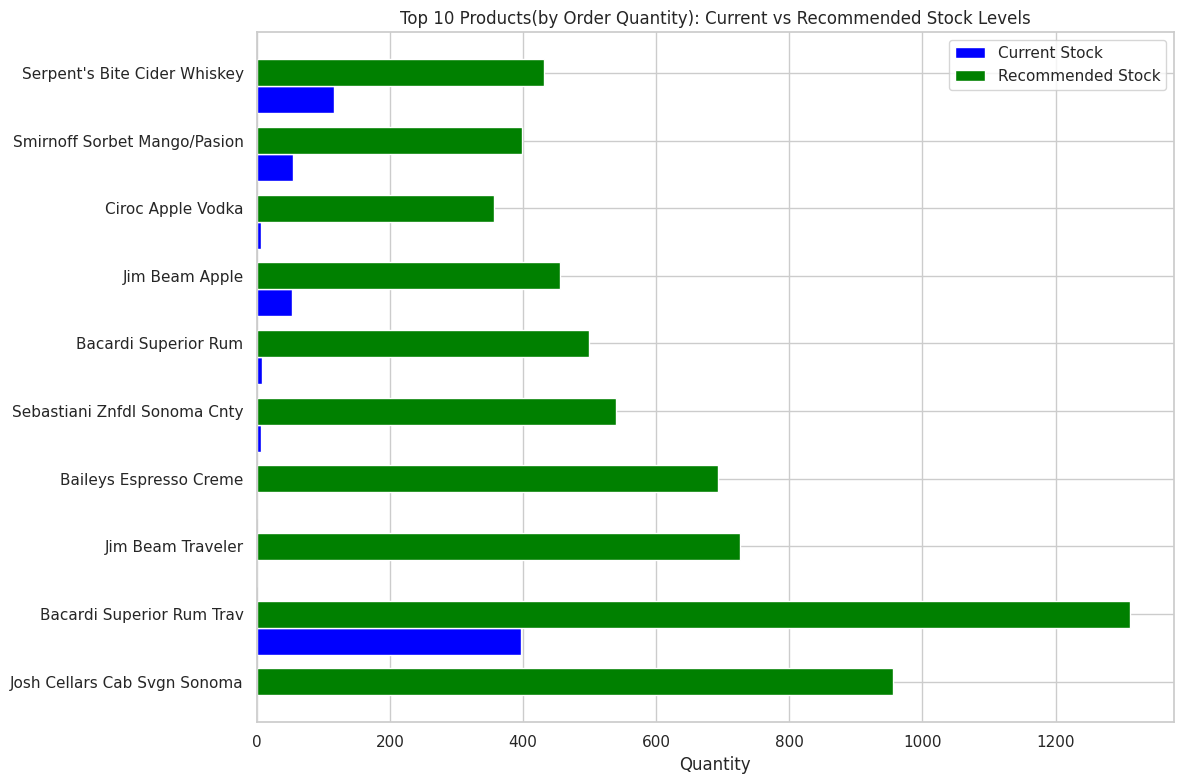

In [ ]:
# Filtering the data to show the top 10 products where the ordering quantity is highest
top_products_to_order = final_data.nlargest(10, 'Order_Quantity')

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 8))

# Indexing for the bars
ind = np.arange(len(top_products_to_order))

# Width of the bars
bar_width = 0.4

# Plotting current stock and recommended stock side by side
ax.barh(ind, top_products_to_order['Current_Stock'], bar_width, color='blue', label='Current Stock')
ax.barh([i + bar_width for i in ind], top_products_to_order['Recommended_Stock_Level'], bar_width, color='green', label='Recommended Stock')

# Setting the y-axis labels to product descriptions
ax.set(yticks=[i + bar_width for i in ind], yticklabels=top_products_to_order['Description'], ylim=[2 * bar_width - 1, len(ind)])

# Adding the legend
ax.legend()

# Adding labels and title
ax.set_xlabel('Quantity')
ax.set_title('Top 10 Products(by Order Quantity): Current vs Recommended Stock Levels')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2016-02-12,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2016-02-13,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2016-02-19,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2016-02-22,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE


In [ ]:
sales['Total Amount'] = sales['SalesDollars'] + sales['ExciseTax']

In [ ]:
High_sales_item =sales.loc[sales['SalesQuantity'].idxmax(), 'VendorName']
Quty3 = sales['SalesQuantity'].max()
print("High sales Vendor Name:- ",High_sales_item,"Quantity :-", Quty3)

High sales Vendor Name:-  E & J GALLO WINERY          Quantity :- 432


In [ ]:
total_num_of_invoice3 = sales[sales['VendorName'] == 'E & J GALLO WINERY         '].shape[0]
print('Total Number Of Invoice:-',total_num_of_invoice3)
Spend_Total_Amount3 =sales.loc[sales['VendorName'] == 'E & J GALLO WINERY         ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount3)

Total Number Of Invoice:- 65240
Spend Total Amount:- 1575923.91


In [ ]:
Low_sales_item =sales.loc[sales['SalesQuantity'].idxmin(), 'VendorName']
Quty4 = sales['SalesQuantity'].min()
print("Low sales Vendor Name:- ",Low_sales_item,"Quantity :-", Quty4)

Low sales Vendor Name:-  JIM BEAM BRANDS COMPANY     Quantity :- 1


In [ ]:
Spend_Total_Amount4 =sales.loc[sales['VendorName'] == 'JIM BEAM BRANDS COMPANY    ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount4)

Spend Total Amount:- 2703876.6599999997


In [ ]:
sales['Description'].unique()

array(['Jim Beam w/2 Rocks Glasses', "Maker's Mark Combo Pack",
       'F Coppola Dmd Ivry Cab Svgn', ..., 'Anarkos Puglia',
       'Bols Creme De Noyaux', 'Austin Hope 10 Syrah'], dtype=object)

<Axes: xlabel='Total Amount', ylabel='Description'>

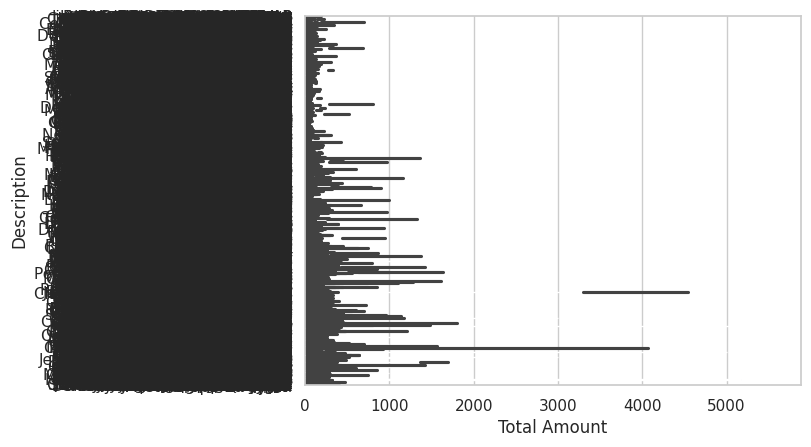

In [ ]:
sns.barplot(x='Total Amount', y='Description', data=sales)